Image Matching Techniques

To be able to match two images and find common characteristics, we first need to detect features in each image. After extracting and comparing features we can prove if two images are similar or have similar characteristics.

Let us go through the various feature detection techniques we can use while matching images.

1. SIFT ( Scale Invariant Feature Transform): 
SIFT is an algorithm that is used for the purpose of matching images. 
There are mainly four steps involved in the SIFT algorithm.
- Scale-space peak selection: Potential location for finding features.
- Keypoint Localization: Accurately locating the feature keypoints.
- Orientation Assignment: Assigning orientation to keypoints.
- Keypoint descriptor: Describing the keypoints as a high dimensional vector.
- Keypoint Matching
Unfortunately SIFT is not free to use, but since it's patent expired last year, I have included a code sample below.

IMPLEMENTATION OF SIFT
1. Import resources and display image

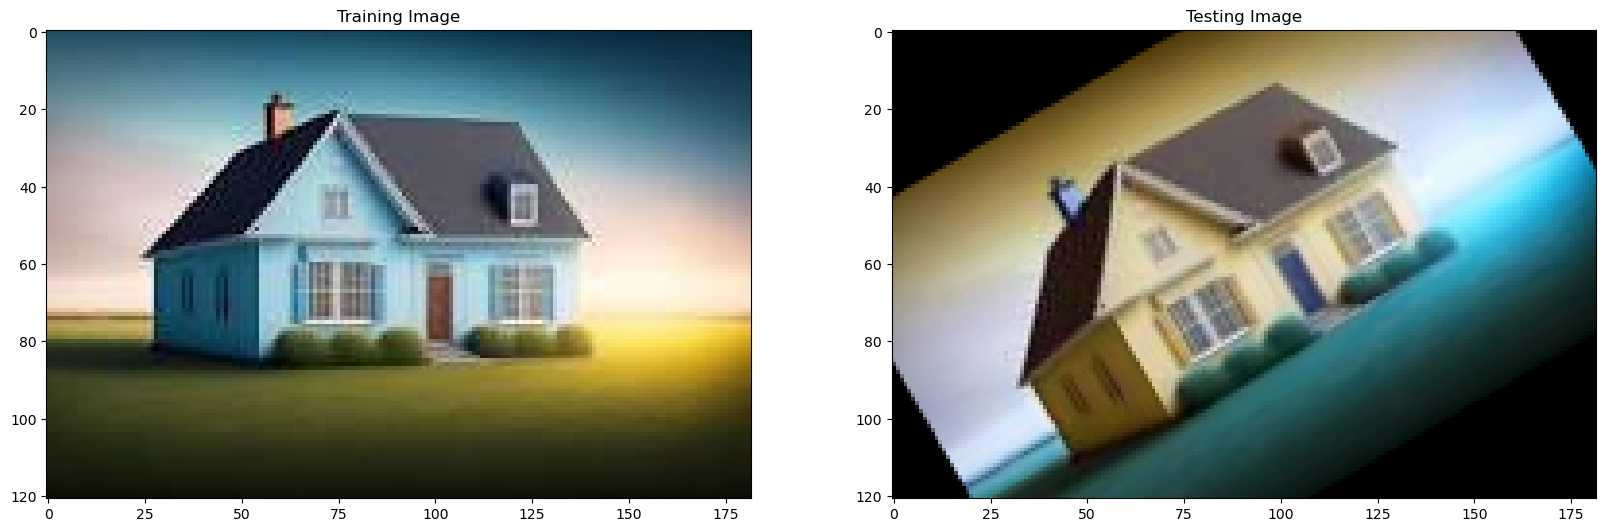

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
img1 = cv2.imread('h3.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = img1
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

2. Extract features and create descriptors

Number of Keypoints Detected In The Training Image:  86
Number of Keypoints Detected In The Query Image:  107


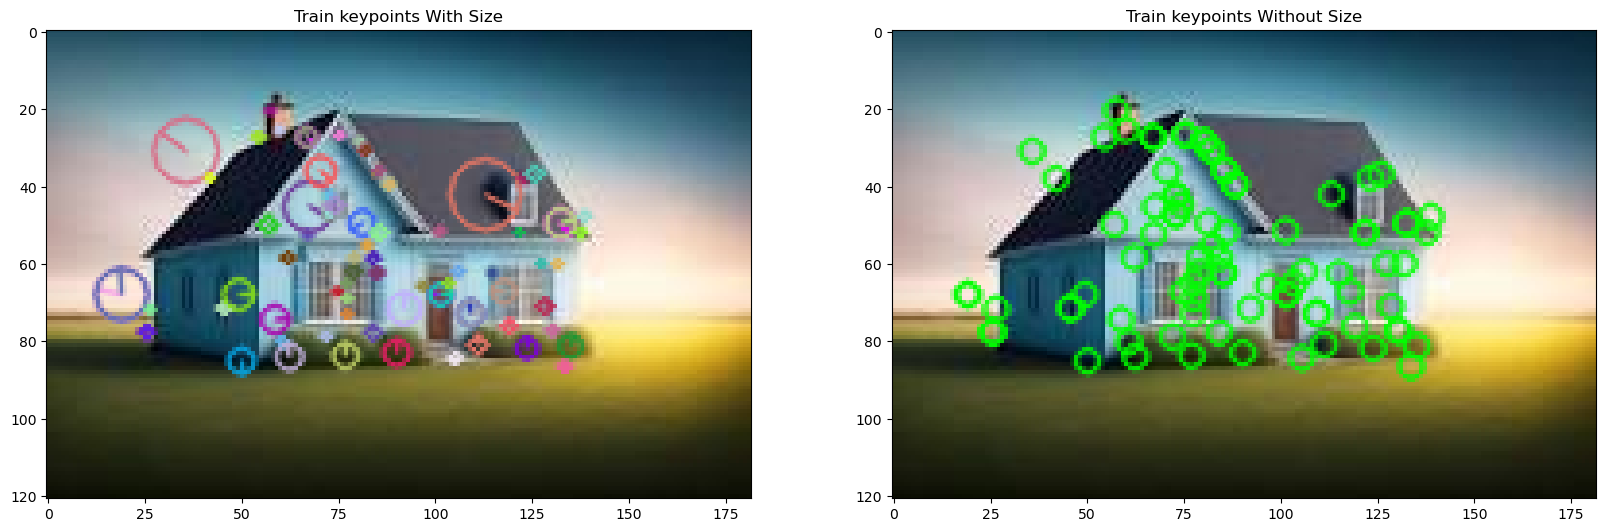

In [2]:
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

3. Matching keypoints to find similarity

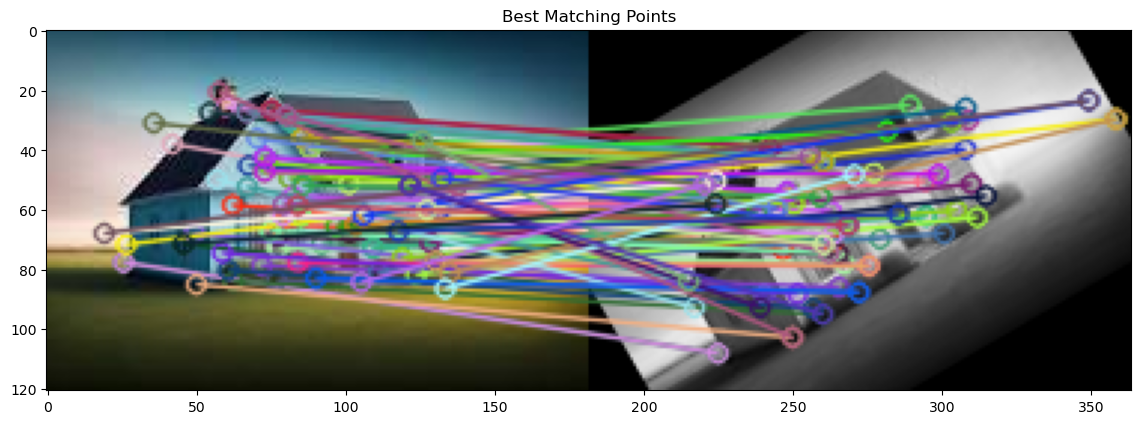


Number of Matching Keypoints Between The Training and Query Images:  86


In [3]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

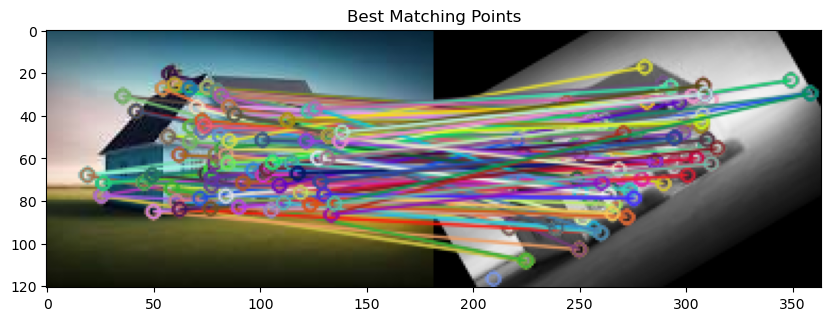


Number of Matching Keypoints Between The Training and Query Images:  86


In [4]:
# Create a FLANN based Matcher object.
FLANNINDEXKDTREE = 1
indexparams = dict(algorithm = FLANNINDEXKDTREE, trees = 5)
searchparams = dict(checks=50)
flann = cv2.FlannBasedMatcher(indexparams,searchparams)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = flann.knnMatch(train_descriptor, test_descriptor, k=2)

matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
 if m.distance < 0.7*n.distance:
  matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
 flags = cv2.DrawMatchesFlags_DEFAULT)

result = cv2.drawMatchesKnn(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray)

# Display the best matching points
plt.rcParams['figure.figsize'] = [10.0, 10.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

2. SURF (Speeded Up Robust Features):
The one disadvantage of SIFT is that it is slow. SURF adds a lot of features to SIFT to improve the speed of the algorithm in every step. SURF is good at handling images with blurring and rotation but not good at handling viewpoint change and illumination change. SURF is better than SIFT in rotation invariant, blur, and warp transform. SIFT is better than SURF in different scale images. SURF is three times faster than SIFT because of the use of integral image and box filters.
Unlike SIFT, SURF is still patented so I am unable to inclue a code demo. 

3. ORB (Oriented Fast and Rotated BREIF):
ORB uses the BREIF descriptor and FAST feature detector to extract and detect features. The FAST (Features from Accelerated Segment Test) detector algorithm is a corner detection method, which can be used to extract feature points and to track and map objects in many computer vision tasks. The FAST algorithm offers a very high level of computational efficiency which makes it suitable for real-time video processing applications. The BRIEF (Binary Robust Independant Elementary Features) descriptor uses binary strings as an efficient feature point descriptor. When keypoints or features are extracted, a descriptor must be computed for each of them. Feature descriptors encode interesting information into a series of numbers and act as a sort of numerical “fingerprint” that can be used to differentiate one feature from another. Brief convert image patches into a binary feature vector so that together they can represent an object. Orb makes use of the efficiency provided by both BREIF and FAST to offer a very high level of feature detection and image matching

IMPLEMENTATION OF ORB
1. Import resources and display image

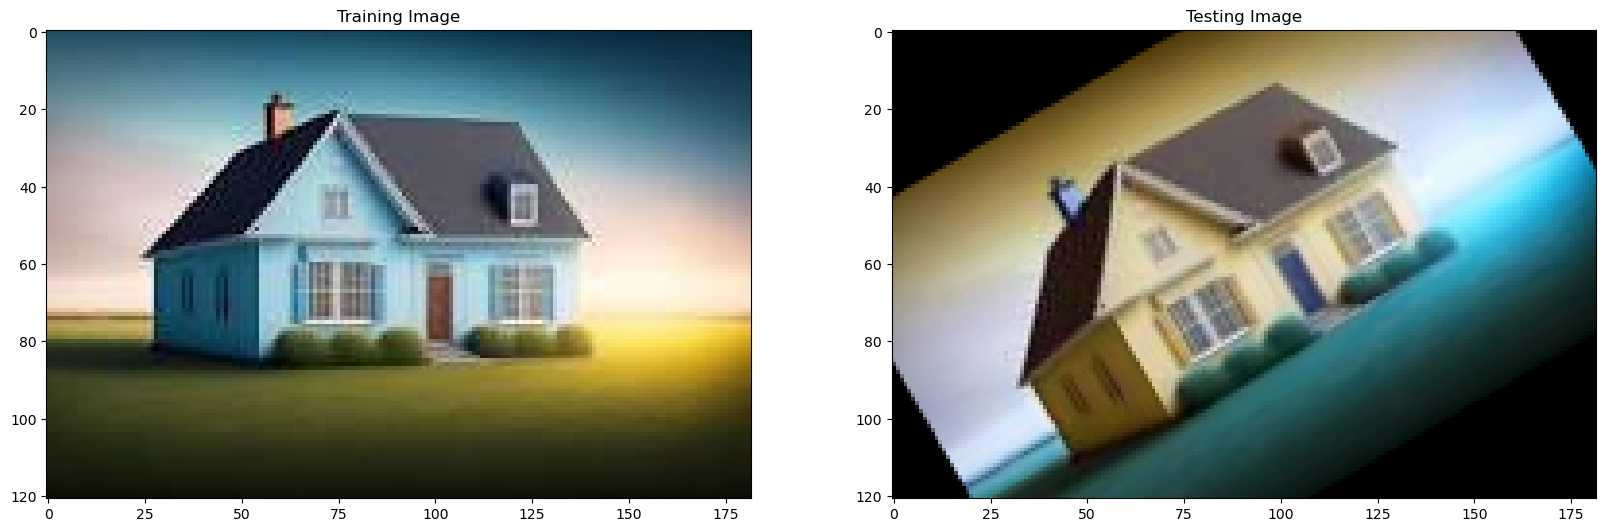

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
img1 = cv2.imread('h3.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = img1
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

2. Extracting Features and creating descriptors

Number of Keypoints Detected In The Training Image:  251
Number of Keypoints Detected In The Query Image:  238


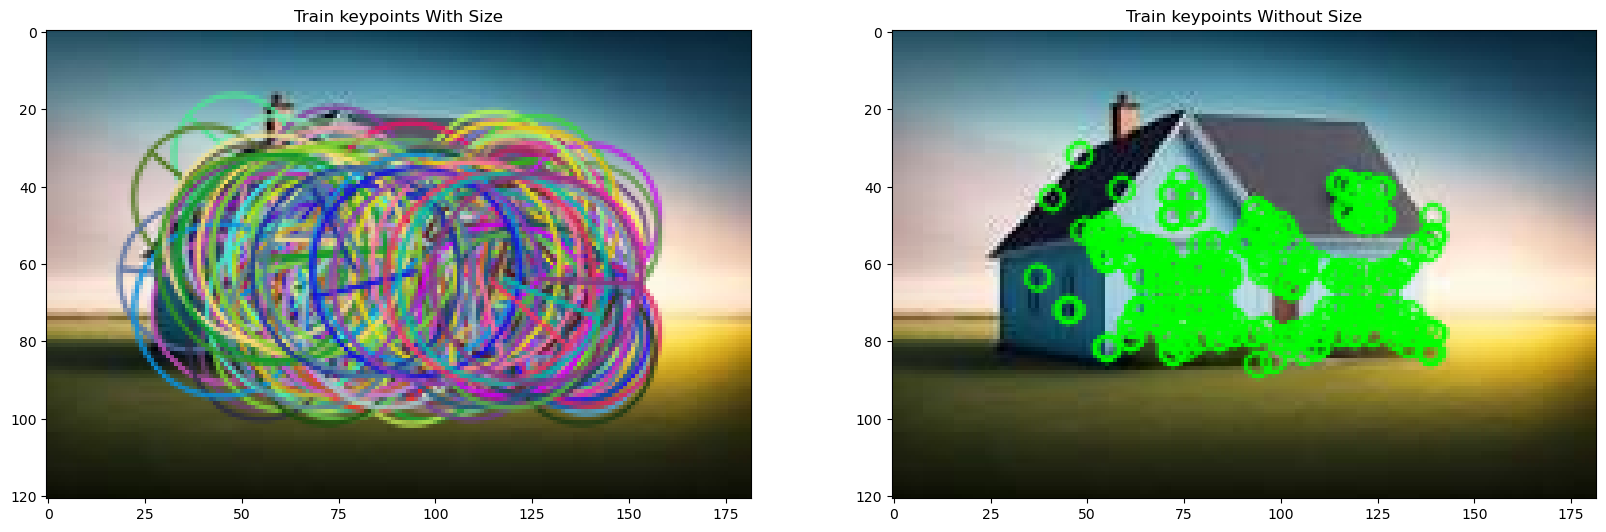

In [6]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

3. Matching extracted features to find similarity

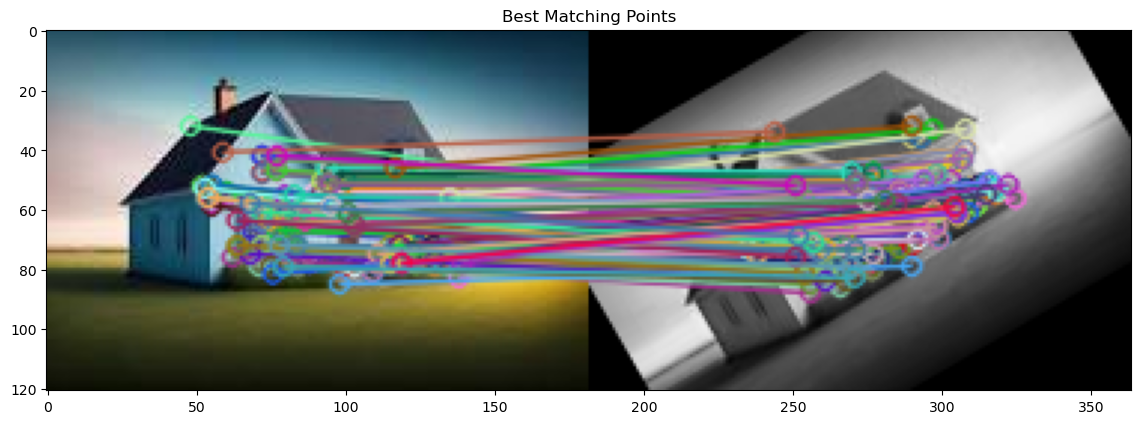


Number of Matching Keypoints Between The Training and Query Images:  141


In [7]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

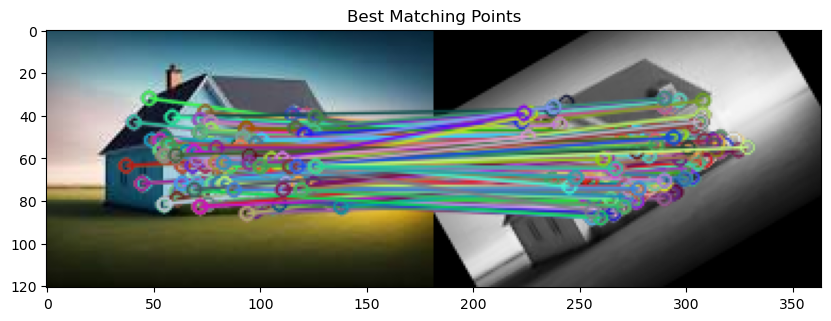


Number of Matching Keypoints Between The Training and Query Images:  251


In [8]:
# Create a FLANN based Matcher object.
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
 table_number = 6, # 12
 key_size = 12, # 20
 multi_probe_level = 1) #2
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(indexparams,searchparams)


train_descriptor = np.float32(train_descriptor)
test_descriptor = np.float32(test_descriptor)


# Perform the matching between the ORB descriptors of the training image and the test image
matches = flann.knnMatch(train_descriptor, test_descriptor, k=2)

matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
 if m.distance < 0.7*n.distance:
  matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
 flags = cv2.DrawMatchesFlags_DEFAULT)

result = cv2.drawMatchesKnn(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray)

# Display the best matching points
plt.rcParams['figure.figsize'] = [10.0, 10.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

Matching Algorithms

Now that we have dicussed feature detection algorithms, let us talk about feature matching algorithms. As we can see above,
I have used two algorithms:
- Brute-Force matching
- FLANN

1. Brute-Force Matching:
Brute-Force matching takes the extracted features (/descriptors) of one image, matches it with all extracted features belonging to other images in the database, and returns the similar one. This matching algorithm is very slow and the time taken to match linearly increases with the number of features being added. This results in higher computational costs.

2. FLANN (Fast Library for Approximate Nearest Neighbours):
FLANN is an image matching algorithm for fast approximate nearest neighbor searches in high dimensional spaces. These methods project the high-dimensional features to a lower-dimensional space and then generate the compact binary codes. Benefiting from the produced binary codes, fast image search can be carried out via binary pattern matching or Hamming distance measurement and float pattern measurement which uses k-dimensional tree indexes. Both of these methods dramatically reduce the computational cost and further optimizes the efficiency of the search. FLANN matcher is preferred over Brute-Force matcher

Template Matching OpenCV

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv.matchTemplate() for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. (You can check docs for more details). It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). Once you got the result, you can use cv.minMaxLoc() function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.

Finding out if the template is present in the image

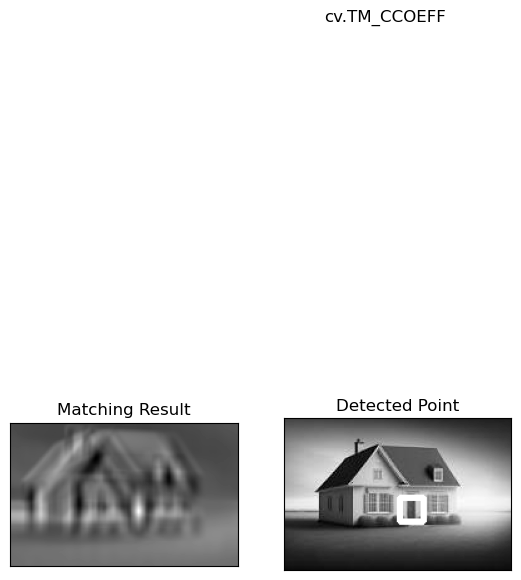

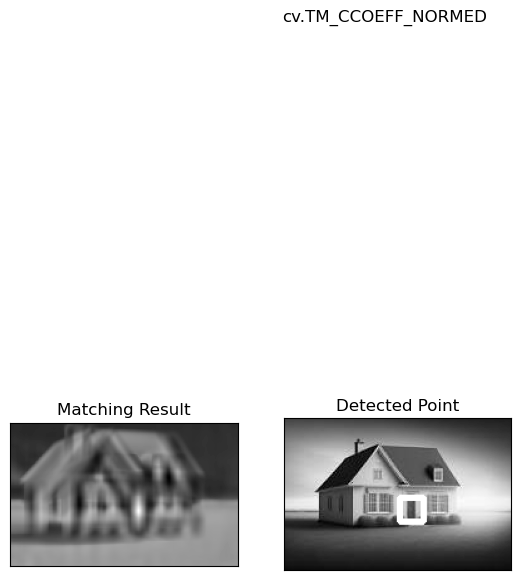

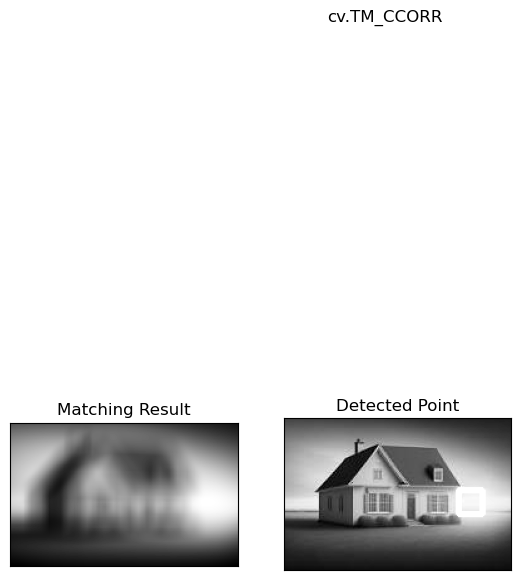

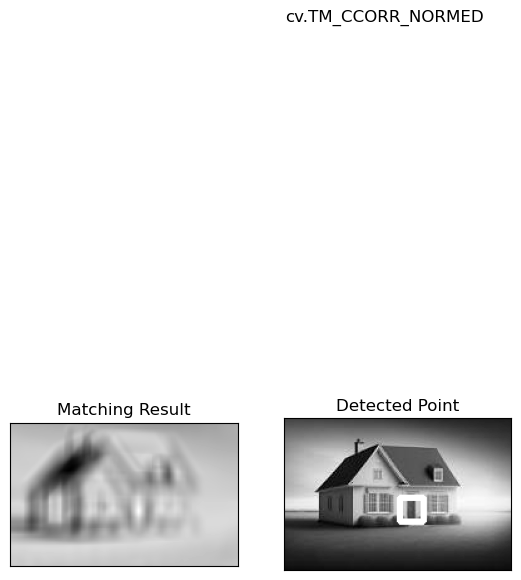

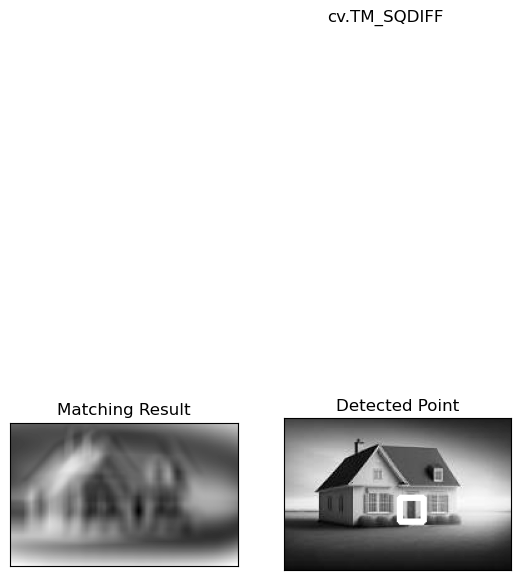

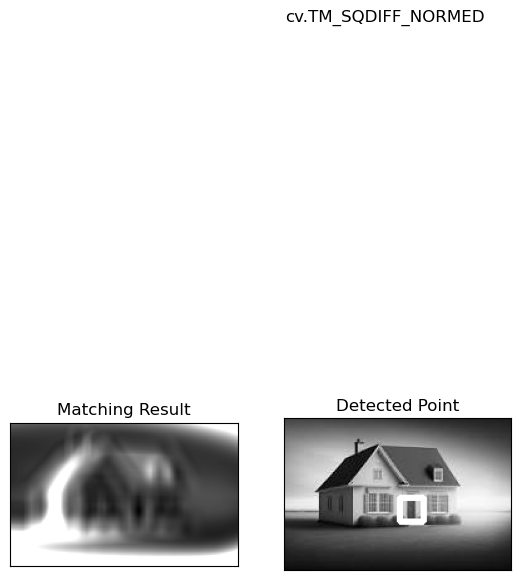

In [35]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('h3.jpg', cv.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv.imread('template.jpg', cv.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
 img = img2.copy()
 method = eval(meth)
 # Apply template Matching
 res = cv.matchTemplate(img,template,method)
 min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
 if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
  top_left = min_loc
 else:
  top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
 cv.rectangle(img,top_left, bottom_right, 255, 3)
 plt.subplot(131),plt.imshow(res,cmap = 'gray')
 plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
 plt.subplot(132),plt.imshow(img,cmap = 'gray')
 plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
 plt.suptitle(meth)
 plt.show()


Matching two different images to see if their are any similarities

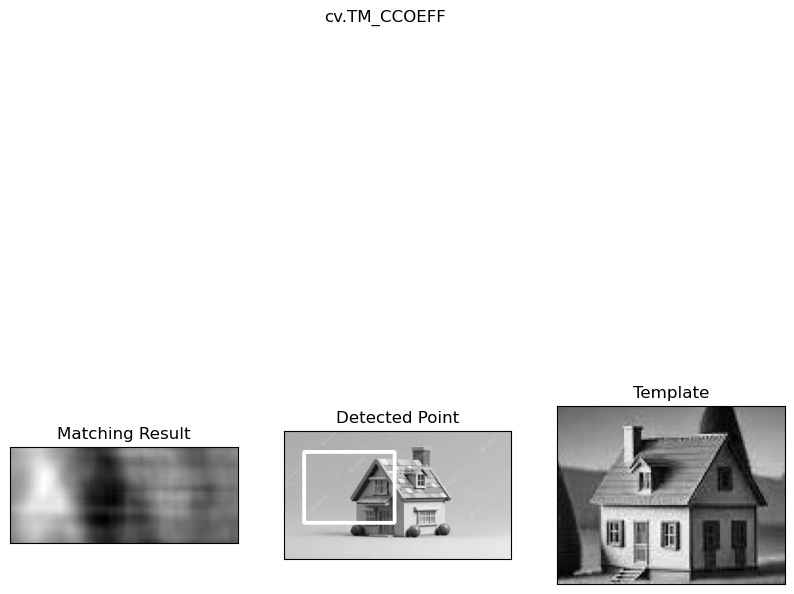

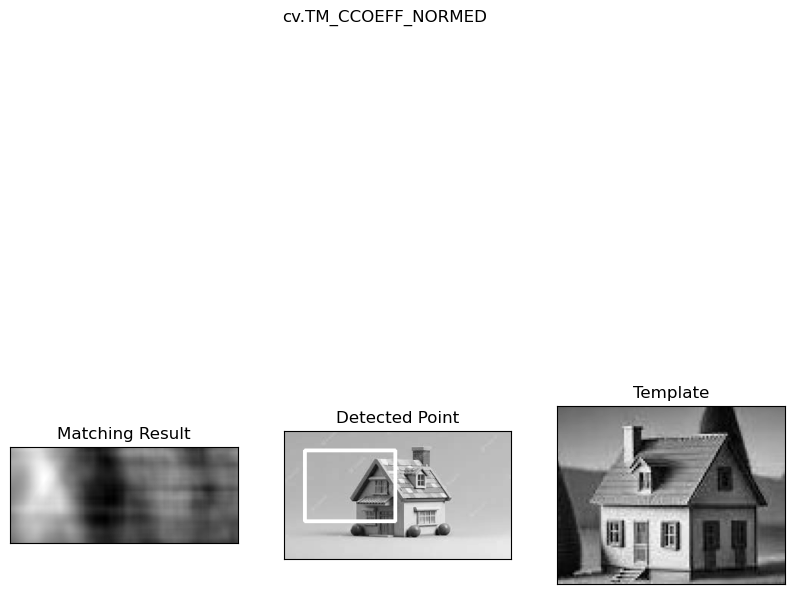

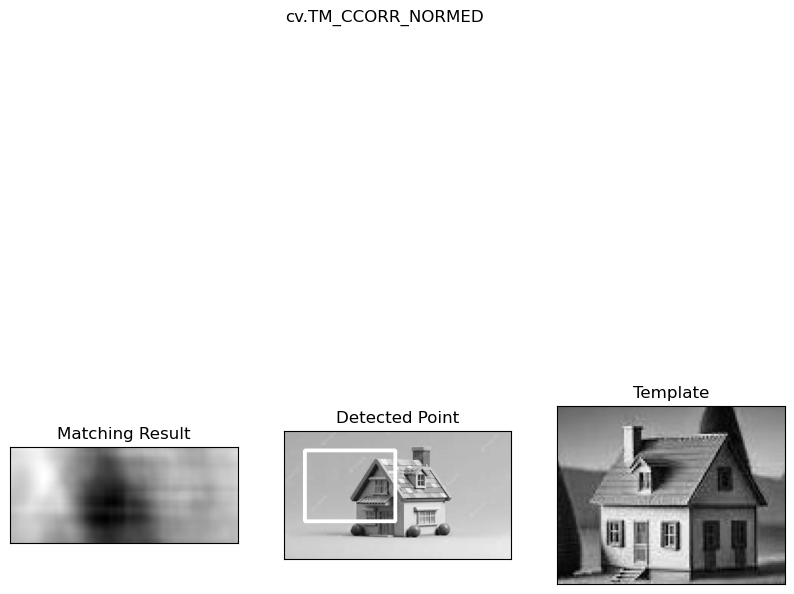

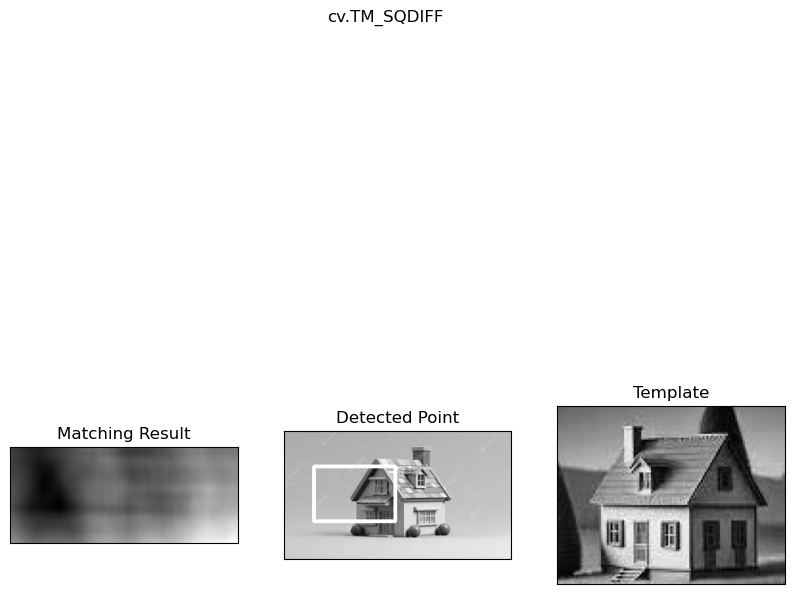

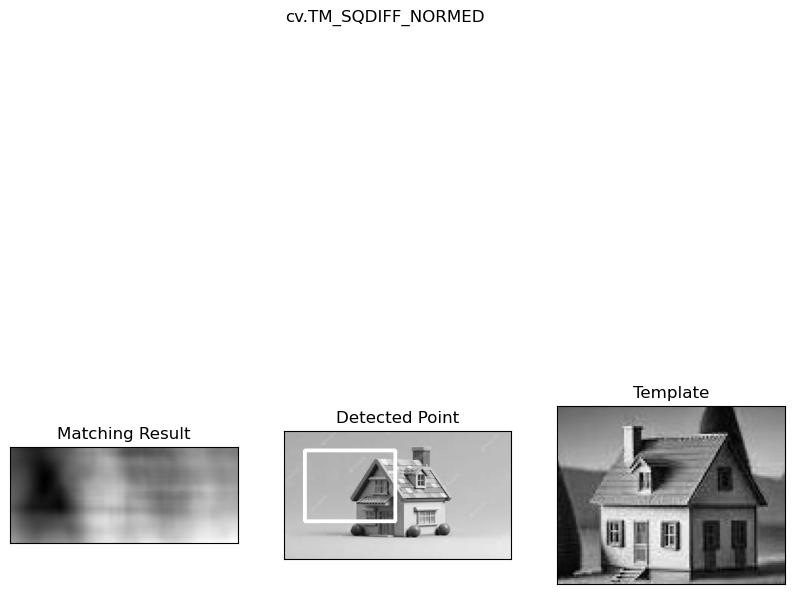

In [33]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('h1.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('h2.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
 img = img2.copy()
 method = eval(meth)
 # Apply template Matching
 res = cv.matchTemplate(img,template,method)
 min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
 if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
  top_left = min_loc
 else:
  top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
 cv.rectangle(img,top_left, bottom_right, 255, 3)
 plt.subplot(131),plt.imshow(res,cmap = 'gray')
 plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
 plt.subplot(132),plt.imshow(img,cmap = 'gray')
 plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
 plt.subplot(133),plt.imshow(template,cmap = 'gray')
 plt.title('Template'), plt.xticks([]), plt.yticks([])
 plt.suptitle(meth)
 plt.show()

Results

1. SIFT
Number of Keypoints Detected In The Training Image:  86
Number of Keypoints Detected In The Query Image:  107
 - Brute-Force Matcher:
 Number of Matching Keypoints Between The Training and Query Images:  86
 - FLANN
 Number of Matching Keypoints Between The Training and Query Images:  86
 
2. ORB
Number of Keypoints Detected In The Training Image:  251
Number of Keypoints Detected In The Query Image:  238
- Brute-Force Matcher:
Number of Matching Keypoints Between The Training and Query Images:  142
- FLANN:
Number of Matching Keypoints Between The Training and Query Images:  251

3. Template Matching using OpenCV
 1. Finding out if the template is present in the image
  - cv.TM_CCOEFF : Accurate Match
  - cv.TM_CCOEFF_NORMED : Accurate Match
  - cv.TM_CCORR : Inaccurate Match
  - cv.TM_CCORR_NORMED : Accurate Match
  - cv.TM_SQDIFF : Accurate Match
  - cv.TM_SQDIFF_NORMED: Accurate Match
 2. Matching two different images to see if their are any similarities
  - cv.TM_CCOEFF : Inaccurate Match
  - cv.TM_CCOEFF_NORMED : Inaccurate Match
  - cv.TM_CCORR_NORMED : Inaccurate Match
  - cv.TM_SQDIFF : Inaccurate Match
  - cv.TM_SQDIFF_NORMED: Inaccurate Match


Conclusion

Based on the results, we can conclude that using a combination of ORB and FLANN gives us the most accurate result.
ORB is able to detect a larger number of features from the training image and FLANN is able to correctly match all of the features between the training and the test image.

With respect to template matching, one can only find features from the image that exactly match the template. No new features are detected. For e.g if we are trying to match a picture of two different houses, the function is unable to detect and match similar features. Therefore this method is inefficient for this problem statement.